# Filtering Signals
In this tutorial we will learn how to filter MIMIC waveform signals.

The **objectives** are:
- To learn how to create a filter using the [SciPy signal processing package].
- To understand how to interpret the amplitude-response of a filter.
- To gain experience in filtering PPG signals.

<div class="alert alert-block alert-warning"> <b>Context:</b> Filtering is used to eliminate noise from physiological signals. For instance, ECG signals can contain mains frequency noise due to electrical interference. Ideally, a filter would attenuate unwanted frequency content in a signal whilst retaining the physiological frequency content.</div>

## Setup

In [3]:
# setup
import sys
import numpy as np
import scipy.signal as sp

from matplotlib import pyplot as plt

import wfdb

## Download data
Download data from a segment in the MIMIC III Waveform Database

In [4]:
# Select the first record
selected_record = '3000125_0005'
database_name = 'mimic3wdb/1.0/30/3000125/'
print("Selected record: {}".format(selected_record))

# load data from this record
start_seconds = 60
no_seconds_to_load = 5
fs = 125
segment_data = wfdb.rdrecord(record_name = selected_record, sampfrom = fs*start_seconds, sampto = fs*(start_seconds + no_seconds_to_load), pn_dir = database_name) 
print("{} seconds of data loaded from: {}".format(no_seconds_to_load, selected_record))

Selected record: 3000125_0005
5 seconds of data loaded from: 3000125_0005


---
## Extract the PPG signal
<div class="alert alert-block alert-warning"> <b>Resource:</b> This step is taken from the <a href="https://wfdb.io/mimic_wfdb_tutorials/tutorial/notebooks/differentiation.html">Differentiation</a> tutorial. </div>

- Extract the PPG signal from the segment data

In [5]:
ppg = segment_data.p_signal[:,2]

---
## Create a filter
<div class="alert alert-block alert-warning"> <b>Resource:</b> This step is taken from the <a href="https://wfdb.io/mimic_wfdb_tutorials/tutorial/notebooks/differentiation.html">Differentiation</a> tutorial. </div>

- Import the [SciPy signal processing package](https://docs.scipy.org/doc/scipy/tutorial/signal.html), which contains functions for filtering and differentiating.

In [6]:
import scipy.signal as sp

- Specify the high- and low-pass filter cut-offs

In [7]:
lpf_cutoff = 0.7 # Hz
hpf_cutoff = 10 # Hz

- Create the filter

In [8]:
sos_ppg = sp.butter(10, [lpf_cutoff, hpf_cutoff], btype = 'bp', analog = False, output = 'sos', fs = segment_data.fs)
w, h = sp.sosfreqz(sos_ppg, 2000, fs = fs)

- Plot filter characteristics

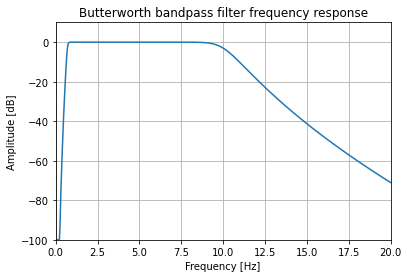

In [11]:
fig, ax = plt.subplots()

ax.plot(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Butterworth bandpass filter frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((0, 20, -100, 10))
ax.grid(which='both', axis='both')


<div class="alert alert-block alert-info"> <b>Question:</b> What does this plot tell us about the filter characteristics? What types of noise does the filter attenuate? </div>

<div class="alert alert-block alert-info"> <b>Extension:</b> How could we re-design the filter to retain frequency content of upto 20 Hz, but eliminate mains frequencies? </div>

---
## Filter the PPG signal

- Filter the PPG signal in preparation for differentiation using a Butterworth filter provided by the [butter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html) function.

In [29]:
ppg_filt = sp.sosfiltfilt(sos_ppg, ppg)

- Plot original and filtered PPG signals

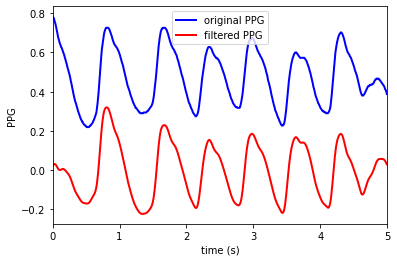

In [30]:
fig, ax = plt.subplots()
t = np.arange(0, len(ppg_filt))/segment_data.fs
ax.plot(t, ppg, linewidth=2.0, color = 'blue', label = "original PPG")
ax.plot(t, ppg_filt, linewidth=2.0, color = 'red', label = "filtered PPG")
ax.set(xlim=(0, no_seconds_to_load))
plt.xlabel('time (s)')
plt.ylabel('PPG')

plt.legend()
plt.show()

<div class="alert alert-block alert-warning"> <b>Note:</b> The PPG signals in MIMIC have already been filtered somewhat by the clinical monitors used to record them. </div>

<div class="alert alert-block alert-info"> <b>Further Work:</b> Several different types of filters have been used to filter the PPG signal (e.g. Chebyshev filter, Butterworth filter). Have a look at [this article](https://doi.org/10.1038/sdata.2018.76) for examples of several filter types (on pp.8-9). Which type of filter do the authors recommend? Can you re-design the filter above to use this type of filter? </div>